In [1]:
import math
import time
import numpy as np
import torch


### 3.1.3 The Normal Distribution and Squared Loss

In [3]:
def normal(x, mu, sigma):
  p = 1/math.sqrt(2 * math.pi * sigma **2)
  return p * np.exp(-0.5 * (x - mu) **2 / (2 * sigma **2))

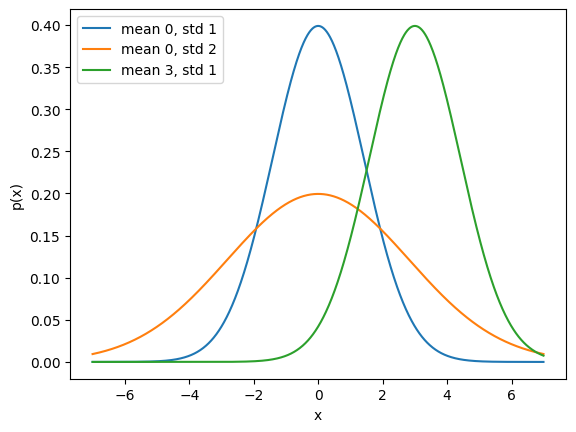

In [9]:
import matplotlib.pyplot as plt # Import the matplotlib library

x = np.arange(-7, 7 , 0.01)

params = [(0,1), (0,2), (3,1)]

# Iterate through each set of parameters and plot them individually
for mu, sigma in params:
    y = normal(x, mu, sigma)  # Calculate y-values for the current parameters
    plt.plot(x, y, label=f'mean {mu}, std {sigma}') # Plot the line for the current parameters

plt.xlabel('x')
plt.ylabel('p(x)')
plt.figsize=(4.5, 2.5)
plt.legend() # Display the legend
plt.show()  # Show the plot

In [10]:
import math
import time
import numpy as np
import torch
from torch import nn

In [11]:
def add_to_class(Class):
  def wrapper(obj):
    setattr(Class,obj. __name__, obj)
  return wrapper

In [12]:
class A:
  def __init__(self):
    self.b = 1

a = A()

In [13]:
%matplotlib inline
import random
import torch

### 3.3.1 Generating the Dataset

In [2]:
!pip install lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 818.9/818.9 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [14]:
import math
import time
import numpy as np
import torch
from torch import nn
from lightning import LightningDataModule  # Import LightningDataModule
from torch.utils.data import DataLoader

class SyntheticRegressionData(LightningDataModule):  # Inherit from LightningDataModule
    """Synthetic data for linear regression."""
    def __init__(self, w, b, noise=0.01, num_train=1000, num_val=1000,
                 batch_size=32):
        super().__init__()
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, len(w))
        noise = torch.randn(n, 1) * noise
        self.y = torch.matmul(self.X, w.reshape((-1, 1))) + b + noise
        self.num_train = num_train
        self.num_val = num_val
        self.batch_size = batch_size

    def train_dataloader(self):
        """Return the training dataloader."""
        # Slice the data for training set
        i = slice(0, self.num_train)
        # Create a TensorDataset from the sliced data
        dataset = torch.utils.data.TensorDataset(self.X[i], self.y[i])
        # Return a DataLoader for the training set
        return DataLoader(dataset, self.batch_size, shuffle=True)

    def val_dataloader(self):
        """Return the validation dataloader."""
        # Slice the data for validation set
        i = slice(self.num_train, None)
        # Create a TensorDataset from the sliced data
        dataset = torch.utils.data.TensorDataset(self.X[i], self.y[i])
        # Return a DataLoader for the validation set
        return DataLoader(dataset, self.batch_size, shuffle=False)


# Re-instantiate the `data` object
data = SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)

X, y = next(iter(data.train_dataloader()))
print('X shape:', X.shape, '\ny shape:', y.shape)

X shape: torch.Size([32, 2]) 
y shape: torch.Size([32, 1])


아래에서 실제 매개변수를 w = [2,-3.4]⊤ 및 𝑏 = 4.2로 설정합니다. 나중에 이러한 실제 값과 비교하여 추정된 매개변수를 확인할 수 있습니다.

In [15]:
data = SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)

In [16]:
print('features:', data.X[0],'\nlabel:', data.y[0])

features: tensor([-0.5526, -0.2916]) 
label: tensor([4.0684])


### 3.3.2 Reading the Dataset

In [6]:
def get_dataloader(self, train):
    if train:
        indices = list(range(0, self.num_train))
        # The examples are read in random order
        random.shuffle(indices)
    else:
        indices = list(range(self.num_train, self.num_train+self.num_val))
    for i in range(0, len(indices), self.batch_size):
        batch_indices = torch.tensor(indices[i: i+self.batch_size])
        yield self.X[batch_indices], self.y[batch_indices]

In [10]:
import math
import time
import numpy as np
import torch
from torch import nn
from lightning import LightningDataModule  # Import LightningDataModule
from torch.utils.data import DataLoader

class SyntheticRegressionData(LightningDataModule):  # Inherit from LightningDataModule
    """Synthetic data for linear regression."""
    def __init__(self, w, b, noise=0.01, num_train=1000, num_val=1000,
                 batch_size=32):
        super().__init__()
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, len(w))
        noise = torch.randn(n, 1) * noise
        self.y = torch.matmul(self.X, w.reshape((-1, 1))) + b + noise
        self.num_train = num_train
        self.num_val = num_val
        self.batch_size = batch_size

    def train_dataloader(self):
        """Return the training dataloader."""
        # Slice the data for training set
        i = slice(0, self.num_train)
        # Create a TensorDataset from the sliced data
        dataset = torch.utils.data.TensorDataset(self.X[i], self.y[i])
        # Return a DataLoader for the training set
        return DataLoader(dataset, self.batch_size, shuffle=True)

    def val_dataloader(self):
        """Return the validation dataloader."""
        # Slice the data for validation set
        i = slice(self.num_train, None)
        # Create a TensorDataset from the sliced data
        dataset = torch.utils.data.TensorDataset(self.X[i], self.y[i])
        # Return a DataLoader for the validation set
        return DataLoader(dataset, self.batch_size, shuffle=False)


# Re-instantiate the `data` object
data = SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)

X, y = next(iter(data.train_dataloader()))
print('X shape:', X.shape, '\ny shape:', y.shape)

X shape: torch.Size([32, 2]) 
y shape: torch.Size([32, 1])


In [11]:
def get_tensorloader(self, tensors, train, indices=slice(0, None)):
    tensors = tuple(a[indices] for a in tensors)
    dataset = torch.utils.data.TensorDataset(*tensors)
    return torch.utils.data.DataLoader(dataset, self.batch_size,
                                       shuffle=train)

def get_dataloader(self, train):
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader((self.X, self.y), train, i)

In [12]:
X, y = next(iter(data.train_dataloader()))
print('X shape:', X.shape, '\ny shape:', y.shape)

X shape: torch.Size([32, 2]) 
y shape: torch.Size([32, 1])


In [13]:
len(data.train_dataloader())

32

## 3.4 Linear Regression Implementation from Scratch

In [17]:
import torch

미니배치 SGD를 사용하여 모델의 매개변수를 최적화하기 전에 먼저 몇 가지 매개변수가 있어야 합니다. 다음에서는 평균이 0이고 표준 편차가 0.01인 정규 분포에서 난수를 그려 가중치를 초기화합니다. 매직넘버 0.01은 실제로는 잘 작동하는 경우가 많지만 인수 시그마를 통해 다른 값을 지정할 수 있습니다. 또한 바이어스를 0으로 설정합니다.

In [19]:
class LinearRegressionScratch(LightningDataModule):
    """The linear regression model implemented from scratch."""
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)

다음으로, 우리는 모델의 입력과 매개변수를 출력과 연관시켜 정의해야 합니다. 선형 모델에 대해 (3.1.4)와 동일한 표기법을 사용하여 입력 특징 X와 모델 가중치 w의 행렬-벡터 곱을 취하고, 각 예제에 오프셋 𝑏를 추가합니다. 곱 Xw는 벡터이고 𝑏는 스칼라입니다.

In [20]:
def forward(self, X):
    return torch.matmul(X, self.w) + self.b

### 3.4.2 Defining the Loss Function
모델을 업데이트하려면 손실 함수의 기울기를 취해야 하므로 먼저 손실 함수를 정의해야 합니다. 여기서는 (3.1.5)의 제곱 손실 함수를 사용합니다. 구현에서는 실제 값 y를 예측 값의 형태 y_hat로 변환해야 합니다. 다음 방법으로 반환되는 결과도 y_hat과 동일한 모양을 갖습니다. 또한 미니배치의 모든 예제 중 평균 손실 값을 반환합니다.

In [21]:
def loss(self, y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

### 3.4.3 Defining the Optimization Algorithm
우리는 단계 메서드에서 매개변수를 업데이트합니다. zero_grad 메서드는 모든 그래디언트를 0으로 설정하며, 이는 역전파 단계 전에 실행되어야 합니다.

In [23]:
from lightning import LightningModule, Trainer, LightningDataModule

class SGD(LightningModule):  # Inherit from LightningModule
    """Minibatch stochastic gradient descent."""
    def __init__(self, params, lr):
        super().__init__()  # Call superclass initialization
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

다음으로 SGD 클래스의 인스턴스를 반환하는 configure_optimizers 메서드를 정의합니다.

In [24]:
def configure_optimizers(self):
    return SGD([self.w, self.b], self.lr)

### 3.4.4 Training
대부분의 경우 모델 품질을 측정하기 위해 검증 데이터셋을 원합니다. 여기서는 모델 성능을 측정하기 위해 각 에포크마다 검증 데이터로더를 한 번씩 전달합니다.

In [25]:

def prepare_batch(self, batch):
    return batch

def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:  # To be discussed later
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx += 1
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1

우리는 모델을 훈련시킬 준비가 거의 되어 있지만, 먼저 몇 가지 훈련 데이터가 필요합니다. 여기서는 SyntheticRegressionData 클래스를 사용하여 몇 가지 실제 매개변수를 전달합니다. 그런 다음 학습률 lr=0.03과 set max_epochs=3로 모델을 훈련시킵니다.

일반적으로 에포크의 수와 학습률은 모두 하이퍼파라미터입니다. 일반적으로 하이퍼파라미터를 설정하는 것은 까다로우며, 일반적으로 훈련을 위해 하나의 세트를, 하이퍼파라미터 선택을 위해 두 번째 세트를, 최종 평가를 위해 세 번째 세트를 사용하고자 합니다. 현재로서는 이러한 세부 사항을 생략하지만, 나중에 수정할 예정입니다.

In [37]:
import torch
from lightning import LightningModule, Trainer, LightningDataModule
from torch.optim import SGD # Import the SGD optimizer from torch.optim

class LinearRegressionScratch(LightningModule):  # Inherit from LightningModule
    """The linear regression model implemented from scratch."""
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)
        self.lr = lr # Assign lr as an attribute

    def forward(self, X):
        return torch.matmul(X, self.w) + self.b

    def loss(self, y_hat, y):
        l = (y_hat - y) ** 2 / 2
        return l.mean()

    def training_step(self, batch, batch_idx):  # Add training_step
        X, y = batch
        y_hat = self(X)
        loss = self.loss(y_hat, y)
        return loss

    def validation_step(self, batch, batch_idx):  # Add validation_step
        X, y = batch
        y_hat = self(X)
        loss = self.loss(y_hat, y)
        self.log('val_loss', loss)  # Log validation loss

    def configure_optimizers(self):
        # Return an instance of the SGD optimizer from torch.optim
        optimizer = SGD([self.w, self.b], lr=self.lr)
        return optimizer

In [44]:
import torch
from lightning import LightningModule, Trainer, LightningDataModule
from torch.optim import SGD
import matplotlib.pyplot as plt

class LinearRegressionScratch(LightningModule):
    """The linear regression model implemented from scratch."""
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)
        self.lr = lr
        self.train_losses = []  # Store training losses
        self.val_losses = []    # Store validation losses

    def forward(self, X):
        return torch.matmul(X, self.w) + self.b

    def loss(self, y_hat, y):
        l = (y_hat - y) ** 2 / 2
        return l.mean()

    def training_step(self, batch, batch_idx):
        X, y = batch
        y_hat = self(X)
        loss = self.loss(y_hat, y)
        self.train_losses.append(loss.item())  # Append training loss
        return loss

    def validation_step(self, batch, batch_idx):
        X, y = batch
        y_hat = self(X)
        loss = self.loss(y_hat, y)
        self.val_losses.append(loss.item())  # Append validation loss
        self.log('val_loss', loss)

    def configure_optimizers(self):
        optimizer = SGD([self.w, self.b], lr=self.lr)
        return optimizer

    def on_train_end(self):
        """Plot the training and validation losses after training."""

        # Print train_losses and val_losses
        print("Train Losses:", self.train_losses)
        print("Validation Losses:", self.val_losses)

        # Create a figure and axes
        fig, ax = plt.subplots()

        # Plot training losses
        ax.plot(self.train_losses, label='Training Loss')

        # Plot validation losses
        ax.plot(self.val_losses, label='Validation Loss')

        # Set labels and title
        ax.set_xlabel('Epoch')  # Or 'Iteration' if you prefer
        ax.set_ylabel('Loss')
        ax.set_title('Training and Validation Loss')

        # Add a legend
        ax.legend()

        # Show the plot
        plt.show()

INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name | Type | Params | Mode
-------------------------------------
-------------------------------------
0         Trainable params
0         Non-trainable params
0         Total params
0.000     Total estimated model params size (MB)
0         Modules in train mode
0         Modules in eval mode
INFO:lig

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (32) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=3` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


Train Losses: [17.836597442626953, 13.123860359191895, 12.949325561523438, 14.743202209472656, 9.647012710571289, 11.536422729492188, 11.758204460144043, 11.742504119873047, 13.62626838684082, 13.08924674987793, 6.98923921585083, 9.852622985839844, 8.644657135009766, 8.054254531860352, 8.698677062988281, 4.594677925109863, 6.080016613006592, 5.112999439239502, 6.823211193084717, 3.969817638397217, 4.497554302215576, 3.1311442852020264, 4.706829071044922, 3.59950852394104, 4.259033203125, 2.962099552154541, 4.046751499176025, 4.284030437469482, 3.0375919342041016, 3.7761900424957275, 3.1948962211608887, 3.4604787826538086, 2.6036157608032227, 1.4598658084869385, 2.2920281887054443, 1.7045834064483643, 1.898856520652771, 1.693050742149353, 1.1640958786010742, 1.0577161312103271, 1.1879268884658813, 1.4886811971664429, 1.7020275592803955, 1.2245707511901855, 1.171743392944336, 0.9834650754928589, 0.7751368880271912, 0.8361324667930603, 0.6203840970993042, 1.0405313968658447, 0.79448884725

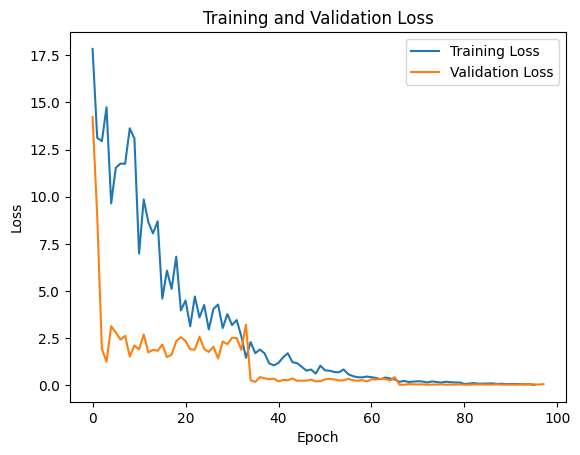

In [45]:
model = LinearRegressionScratch(2, lr=0.03)
data = SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)  # Changed this line
trainer = Trainer(max_epochs=3)
trainer.fit(model, data)